# CONSTRUÇÕES DE FEIXES ELEMENTARES

Alguns construtores de feixes comumente utilizados em laboratório são pré-implementados pelo módulo `optical.beam` (os quais apresentam por argumentos opcionais todos os de `optical.beam.create` exceto `coordinate_system`).

In [1]:
# muda o diretório para onde está optical/
%cd -q ../../

# módulo optical.beam: construtores de perfis iniciais
from optical import beam

# módulo numpy: computação geral de matrizes
import numpy as np                  # importa numpy como "np"
# módulo matplotlib.pyplot: construção de representações gráficas
import matplotlib.pyplot as plt     # importa pyplot como "plt"

# construção da partição dos eixos do plano transversal
x = np.linspace(-40.,+40.,500);     # particiona (-40,+40) em 500
y = np.linspace(-40.,+40.,500);     # particiona (-40,+40) em 500

# construção da malha de pontos
X, Y = np.meshgrid(x, y);           # malha de pontos do plano

## FEIXE GAUSSIANO

O que denominamos aqui por feixe gaussiano consiste no  perfil de entrada do verdadeiro feixe gaussiano, que apresenta a forma
$$
    A(r) = \mathcal{A}\operatorname{exp}(-(r/w_0)^2)\text{.}
$$
Para constuí-lo informamos, em detrimento da função que descreve a envoltória, sua cintura inicial `w0` em micrômetros ($\mu{m}$) - A amplitude $\mathcal{A}$ pode ser inserida por uma simples multiplicação.

In [2]:
# criação de um feixe gaussiano
G = beam.create_G(w0 = 10., region = (X, Y));

### PERFIL TRANSVERSAL DO FEIXE GAUSSIANO

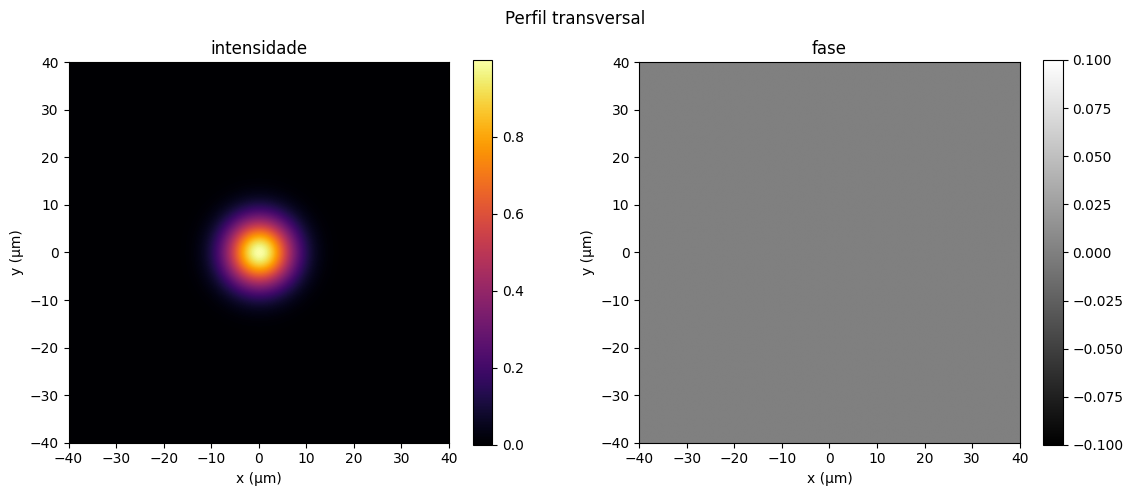

In [3]:
# exibe as imagens geradas em linha
%matplotlib inline

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal')

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(G) ** 2,                 # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
)
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(G),                    # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'gray'                   # com mapa de cores 'gray'
)
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

## FEIXE HERMITE-GAUSS

O que denominamos aqui por feixe hermite-gauss consiste no  perfil de entrada do verdadeiro feixe hermite-gauss, que apresenta a forma
$$
    A(x,y) = \mathcal{A}\mathcal{H}_l(\sqrt{2}x/w_0)\mathcal{H}_l(\sqrt{2}y/w_0)\operatorname{exp}(-(x^2 + y^2)/w_0^2)\text{,}
$$
onde $\mathcal{H}_i$ é o $i$-ésimo polinômio de Hermite. Para constuí-lo informamos, em detrimento da função que descreve a envoltória, sua cintura inicial `w0` em micrômetros ($\mu{m}$) e o par de `indices = (l,m)` - A amplitude $\mathcal{A}$ pode ser inserida por uma simples multiplicação.

In [4]:
# criação de um feixe hermite-gauss
HG = beam.create_HG(w0 = 10., indices = (1, 2), region = (X, Y));

### PERFIL TRANSVERSAL DO FEIXE HERMITE-GAUSS

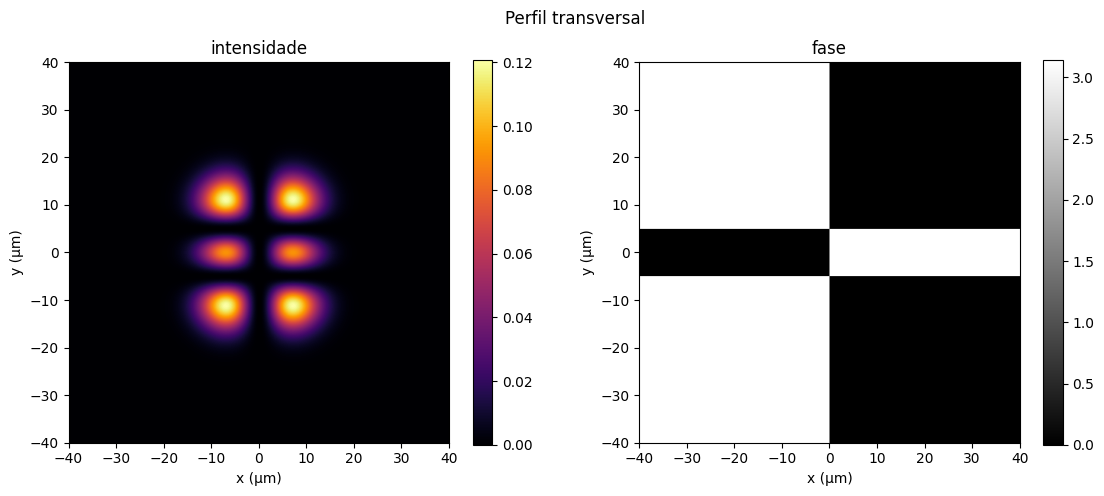

In [5]:
# exibe as imagens geradas em linha
%matplotlib inline

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal')

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(HG) ** 2,                 # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
)
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(HG),                    # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'gray'                   # com mapa de cores 'gray'
)
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

## FEIXE LAGUERRE-GAUSS

O que denominamos aqui por feixe laguerre-gauss consiste no  perfil de entrada do verdadeiro feixe laguerre-gauss, que apresenta a forma
$$
    A(r,\theta) = \mathcal{A}(r/w_0)^l\mathcal{L}^l_m(2(r / w_0)^2)\operatorname{exp}(-(r/w_0)^2)\operatorname{exp}(-\imath\theta)\text{,}
$$
onde $\mathcal{L}^l_m$ é o polinômio generalizado de Laguerre. Para constuí-lo informamos, em detrimento da função que descreve a envoltória, sua cintura inicial `w0` em micrômetros ($\mu{m}$) e o par de `indices = (l,m)` - A amplitude $\mathcal{A}$ pode ser inserida por uma simples multiplicação.

In [6]:
# criação de um feixe laguerre-gauss
LG = beam.create_LG(w0 = 10., indices = (1, 0), region = (X, Y));

### PERFIL TRANSVERSAL DO FEIXE LAGUERRE-GAUSS

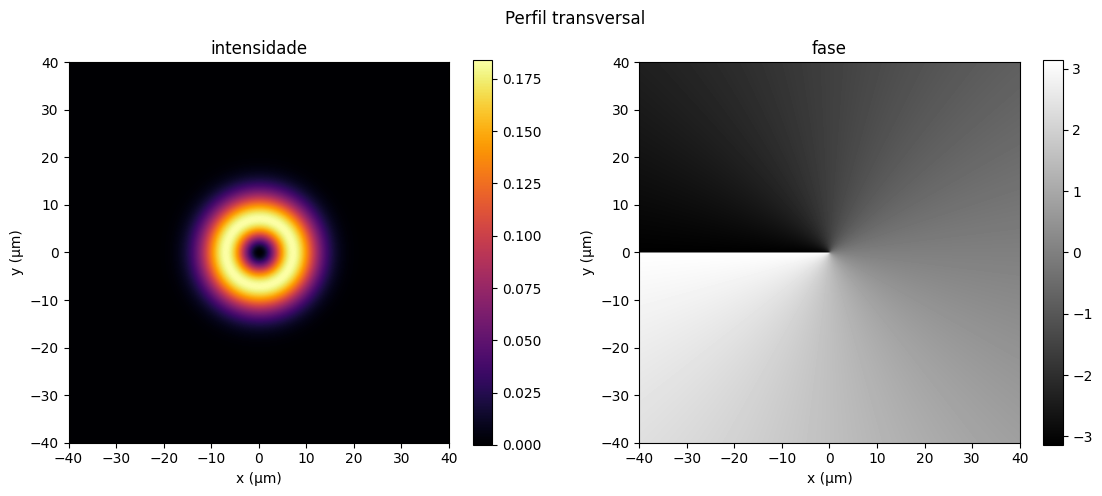

In [7]:
# exibe as imagens geradas em linha
%matplotlib inline

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal')

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(LG) ** 2,                 # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
)
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(LG),                    # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'gray'                   # com mapa de cores 'gray'
)
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');

## FEIXE BESSEL

O que denominamos aqui por feixe bessel consiste no  perfil de entrada do verdadeiro feixe bessel, que apresenta a forma
$$
    A(r,\theta) = \mathcal{A}\mathcal{J}_m(k_t{r})\operatorname{exp}(\imath{m}\theta)\text{,}
$$
onde $\mathcal{J}_m$ é a $m$-ésima função de Bessel. Para constuí-lo informamos, em detrimento da função que descreve a envoltória, sua cintura inicial `k_t` e o índice `m` - A amplitude $\mathcal{A}$ pode ser inserida por uma simples multiplicação.

In [8]:
# criação de um feixe bessel
J = beam.create_J(k_t = 1., m = 2, region = (X, Y));

### PERFIL TRANSVERSAL DO FEIXE BESSEL

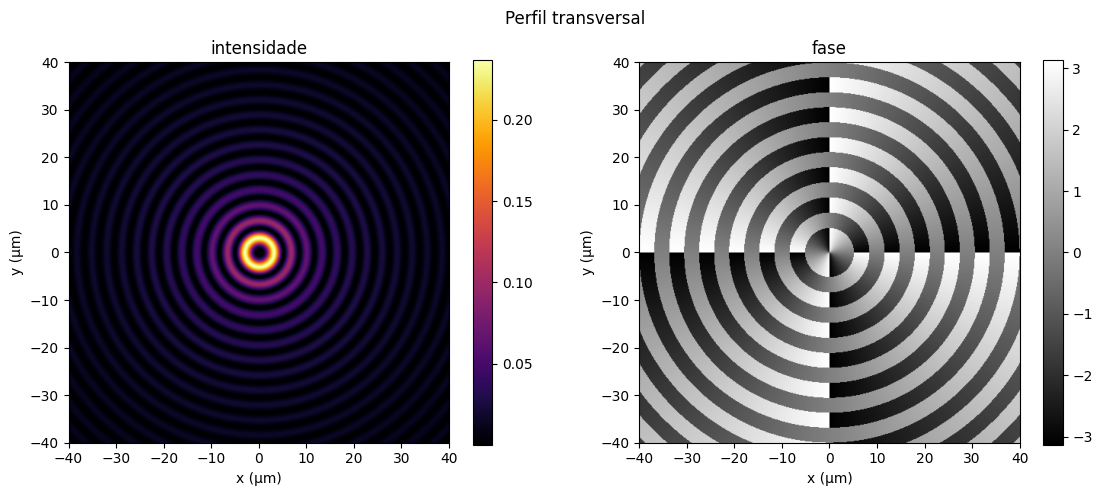

In [9]:
# exibe as imagens geradas em linha
%matplotlib inline

# cria a figura com dois subplots de tamanho (13.5, 5.0) em inches
fig, ax = plt.subplots(1, 2, figsize = (13.5, 5.0));
fig.suptitle('Perfil transversal')

# criação de gráfico no primeiro quadro
grafico = ax[0].imshow(
    np.abs(J) ** 2,                 # com valores de intensidade
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'inferno'                # com mapa de cores 'inferno'
)
# insere a barra de cores da intensidade na figura
fig.colorbar(grafico);
# insere o título do primeiro quadro
ax[0].set_title('intensidade');
# renomeia os eixos do primeiro quadro
ax[0].set_xlabel('x (μm)');
ax[0].set_ylabel('y (μm)');

# criação de gráfico no segundo quadro
grafico = ax[1].imshow(
    np.angle(J),                    # com valores de fase
    # com valores dos eixos
    extent = [
        x[0], x[-1],                # entre (x[0], x[-1])
        y[0], y[-1]                 # entre (y[0], y[-1])
    ],
    cmap = 'gray'                   # com mapa de cores 'gray'
)
# inserir a barra de cores da fase na figura
fig.colorbar(grafico);
# insere o título do segundo quadro
ax[1].set_title('fase');
# renomeia os eixos do segundo quadro
ax[1].set_xlabel('x (μm)');
ax[1].set_ylabel('y (μm)');